In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import variation
%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv('data.csv')

/Users/sumeetkotaria/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(data)

144837

In [4]:
data.head()

,Lead ID,bankid,bank_account_id,account_number,Industry,post_date,description,transaction_type,amount,running_balance,trans_order
0,308148.0,8535.0,12460.0,xxxx9928,Accommodation and Food Services,10-Mar-16,DEPOSIT ID NUMBER xx6836,credit,5000.00,5671.40,1.0
1,308148.0,8535.0,12460.0,xxxx9928,Accommodation and Food Services,21-Mar-16,ATM CASH DEPOSIT 03/21 2904 N BELT LINE RD IRV...,credit,16.00,5687.40,1.0
2,308148.0,8535.0,12460.0,xxxx9928,Accommodation and Food Services,21-Mar-16,ATM CASH DEPOSIT 03/21 2904 N BELT LINE RD IRV...,credit,1000.00,5671.90,3.0
3,308148.0,8535.0,12460.0,xxxx9928,Accommodation and Food Services,21-Mar-16,WAL-MART #0880 IRVING TXxx6007 03/20,debit,1015.50,4671.90,2.0
4,308148.0,8535.0,12460.0,xxxx9928,Accommodation and Food Services,22-Mar-16,CHECK OR SUPPLY ORDERPPD ID: xxxxxx6800,debit,27.62,5644.28,1.0


In [5]:
#Checking for NaN
data.isna().any()

Lead ID             True
bankid              True
bank_account_id     True
account_number      True
Industry            True
post_date           True
description         True
transaction_type    True
amount              True
running_balance     True
trans_order         True
dtype: bool

In [6]:
#Eliminating NaN values
data.dropna(how='all', inplace=True)

In [7]:
data.isna().any()

Lead ID             False
bankid              False
bank_account_id     False
account_number      False
Industry            False
post_date           False
description         False
transaction_type    False
amount              False
running_balance     False
trans_order         False
dtype: bool

In [8]:
data['post_date'] = pd.to_datetime(data['post_date'], format='%d-%b-%y')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29029 entries, 0 to 29028
Data columns (total 11 columns):
Lead ID             29029 non-null float64
bankid              29029 non-null float64
bank_account_id     29029 non-null float64
account_number      29029 non-null object
Industry            29029 non-null object
post_date           29029 non-null datetime64[ns]
description         29029 non-null object
transaction_type    29029 non-null object
amount              29029 non-null float64
running_balance     29029 non-null float64
trans_order         29029 non-null float64
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 2.7+ MB


In [10]:
#Converting IDs from float to int
data['Lead ID'] = data['Lead ID'].apply(lambda x : int(x))
data['bankid'] = data['bankid'].apply(lambda x : int(x))
data['bank_account_id'] = data['bank_account_id'].apply(lambda x : int(x))
data['trans_order'] = data['trans_order'].apply(lambda x : int(x))

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29029 entries, 0 to 29028
Data columns (total 11 columns):
Lead ID             29029 non-null int64
bankid              29029 non-null int64
bank_account_id     29029 non-null int64
account_number      29029 non-null object
Industry            29029 non-null object
post_date           29029 non-null datetime64[ns]
description         29029 non-null object
transaction_type    29029 non-null object
amount              29029 non-null float64
running_balance     29029 non-null float64
trans_order         29029 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 2.7+ MB


In [12]:
#No. of Merchants
no_merchants = len(data['Lead ID'].unique())
print("The number of unique merchants in the data are ", no_merchants)

The number of unique merchants in the data are  21


In [13]:
#No. of Banks
no_banks = len(data['bankid'].unique())
print("The number of unique banks in the data are ", no_banks)

The number of unique banks in the data are  10


In [14]:
#No. of Bank Accounts
no_bank_acc = len(data['bank_account_id'].unique())
print("The number of unique bank accounts in the data are ", no_bank_acc)

The number of unique bank accounts in the data are  53


In [15]:
Table1 = pd.DataFrame({'No_of_bank_account' : data.groupby('Lead ID').bank_account_id.nunique()}).reset_index()
Table1.sort_values('No_of_bank_account', ascending=False).to_csv('no_of_bank_account.csv')
Table1
# Ex 1.i 

,Lead ID,No_of_bank_account
0,308148,1
1,310443,2
2,312745,5
3,313082,1
4,314036,1
5,314559,2
6,316728,6
7,318465,7
8,321146,2
9,321218,1


In [16]:
table2 = pd.DataFrame({'months of data available' : data.groupby(['bankid', 'bank_account_id']).post_date.apply(lambda x: x.dt.strftime("%m/%y").nunique())}).reset_index()
table2.sort_values('months of data available', ascending=False).to_csv('month_data.csv')
table2
# Ex 1.ii

,bankid,bank_account_id,months of data available
0,6192,12654,7
1,6192,12655,12
2,8534,13271,12
3,8534,13272,8
4,8534,13273,7
5,8534,14206,8
6,8534,14629,13
7,8534,14634,12
8,8534,14635,12
9,8534,14636,13


In [17]:
def compute_count_avg(column_name):
    df1 = data.groupby([column_name, 'transaction_type']).size().unstack()
    df1.columns = ['No_of_credit', 'No_of_debit']
    df2_temp = data.set_index('post_date').groupby([column_name,'transaction_type',pd.Grouper(freq='M')]).size().reset_index()
    df2 = df2_temp.groupby([column_name, 'transaction_type'])[0].mean().unstack()
    df2.columns = ['Avg_credit_per_month', 'Avg_debit_per_month']
    table = df1.join(df2, how='left')
    return table

In [18]:
compute_count_avg('Lead ID')

,No_of_credit,No_of_debit,Avg_credit_per_month,Avg_debit_per_month
Lead ID,,,,
308148,172,320,17.200000,32.000000
310443,35,246,3.888889,20.500000
312745,160,600,12.307692,46.153846
313082,112,1026,11.200000,102.600000
314036,276,1985,25.090909,180.454545
314559,143,284,11.000000,23.666667
316728,298,2314,24.833333,178.000000
318465,369,1694,41.000000,188.222222
321146,121,454,13.444444,50.444444


In [19]:
compute_count_avg('bank_account_id')

,No_of_credit,No_of_debit,Avg_credit_per_month,Avg_debit_per_month
bank_account_id,,,,
12460,172.0,320.0,17.200000,32.000000
12654,27.0,223.0,3.857143,31.857143
12655,8.0,23.0,1.333333,2.090909
12835,7.0,11.0,1.750000,2.750000
12836,3.0,5.0,1.500000,1.250000
12837,1.0,NaN,1.000000,NaN
12838,35.0,47.0,3.500000,4.272727
12839,114.0,537.0,8.769231,41.307692
13226,276.0,1985.0,25.090909,180.454545


In [20]:
def compute_dollar_avg(column_name):
    df1 = data.groupby([column_name, 'transaction_type'])['amount'].sum().unstack()
    df1.columns = ['total_dollar_credit','total_dollar_debit']
    df2_temp = data.set_index('post_date').groupby([column_name,'transaction_type',pd.Grouper(freq='M')])['amount'].sum().reset_index()
    df2 = df2_temp.groupby([column_name, 'transaction_type'])['amount'].mean().unstack()
    df2.columns = ['Avg_dollar_credit_per_month', 'Avg__dollar_debit_per_month']
    table = df1.join(df2, how='left')
    return table

In [21]:
compute_dollar_avg('Lead ID')

,total_dollar_credit,total_dollar_debit,Avg_dollar_credit_per_month,Avg__dollar_debit_per_month
Lead ID,,,,
308148,66611.03,61799.63,6661.103000,6179.963000
310443,325133.22,346662.04,36125.913333,28888.503333
312745,719437.89,713250.53,55341.376154,54865.425385
313082,547025.33,558877.28,54702.533000,55887.728000
314036,445920.11,432974.81,40538.191818,39361.346364
314559,527617.92,519814.25,40585.993846,43317.854167
316728,2463019.63,2415843.54,205251.635833,185834.118462
318465,231848.55,229560.94,25760.950000,25506.771111
321146,105932.46,100592.42,11770.273333,11176.935556


In [22]:
compute_dollar_avg('bank_account_id')

,total_dollar_credit,total_dollar_debit,Avg_dollar_credit_per_month,Avg__dollar_debit_per_month
bank_account_id,,,,
12460,66611.03,61799.63,6661.103000,6179.963000
12654,308732.78,328895.38,44104.682857,46985.054286
12655,16400.44,17766.66,2733.406667,1615.150909
12835,16054.00,16054.00,4013.500000,4013.500000
12836,19055.79,19035.00,9527.895000,4758.750000
12837,25.00,NaN,25.000000,NaN
12838,29957.00,29895.62,2995.700000,2717.783636
12839,654346.10,648265.91,50334.315385,49866.608462
13226,445920.11,432974.81,40538.191818,39361.346364


In [23]:
data['bank_account_id'].nunique()

53

In [24]:
data['account_number'].nunique()

52

In [25]:
def agg_count_dollar(column_name):
    t1 = compute_count_avg(column_name)
    t2 = compute_dollar_avg(column_name)
    t3 = t1.join(t2, how='left')
    return t3

In [26]:
agg_count_dollar('Lead ID')

,No_of_credit,No_of_debit,Avg_credit_per_month,Avg_debit_per_month,total_dollar_credit,total_dollar_debit,Avg_dollar_credit_per_month,Avg__dollar_debit_per_month
Lead ID,,,,,,,,
308148,172,320,17.200000,32.000000,66611.03,61799.63,6661.103000,6179.963000
310443,35,246,3.888889,20.500000,325133.22,346662.04,36125.913333,28888.503333
312745,160,600,12.307692,46.153846,719437.89,713250.53,55341.376154,54865.425385
313082,112,1026,11.200000,102.600000,547025.33,558877.28,54702.533000,55887.728000
314036,276,1985,25.090909,180.454545,445920.11,432974.81,40538.191818,39361.346364
314559,143,284,11.000000,23.666667,527617.92,519814.25,40585.993846,43317.854167
316728,298,2314,24.833333,178.000000,2463019.63,2415843.54,205251.635833,185834.118462
318465,369,1694,41.000000,188.222222,231848.55,229560.94,25760.950000,25506.771111
321146,121,454,13.444444,50.444444,105932.46,100592.42,11770.273333,11176.935556


In [27]:
agg_count_dollar('Industry')

,No_of_credit,No_of_debit,Avg_credit_per_month,Avg_debit_per_month,total_dollar_credit,total_dollar_debit,Avg_dollar_credit_per_month,Avg__dollar_debit_per_month
Industry,,,,,,,,
Accommodation and Food Services,1214,2222,93.384615,170.923077,1196313.48,1180193.03,92024.113846,90784.079231
"Agriculture, Forestry, Fishing and Hunting",57,849,5.181818,65.307692,1444858.49,1466503.18,131350.771818,112807.936923
Construction,449,3215,32.071429,214.333333,3007232.14,2974893.22,214802.295714,198326.214667
Educational Services,282,345,21.692308,26.538462,177402.52,174827.66,13646.347692,13448.281538
Finance and Insurance,4939,773,379.923077,59.461538,2722093.90,2676941.14,209391.838462,205918.549231
Health Care and Social Assistance,715,2600,55.000000,200.000000,11172413.48,11158610.26,859416.421538,858354.635385
Information Technology,143,284,11.000000,23.666667,527617.92,519814.25,40585.993846,43317.854167
Other Services (except Public Administration),812,1664,62.461538,128.000000,4573141.55,4606088.35,351780.119231,354314.488462
"Professional, Scientific, and Technical Services",272,1626,18.133333,108.400000,1266463.22,1272127.81,84430.881333,84808.520667


In [28]:
agg_count_dollar('bankid')

,No_of_credit,No_of_debit,Avg_credit_per_month,Avg_debit_per_month,total_dollar_credit,total_dollar_debit,Avg_dollar_credit_per_month,Avg__dollar_debit_per_month
bankid,,,,,,,,
6192,35,246,3.888889,20.500000,325133.22,346662.04,36125.913333,28888.503333
8534,5441,3311,340.062500,220.733333,3772067.37,3739198.97,235754.210625,249279.931333
8535,1649,4665,117.785714,333.214286,2324372.47,2318573.46,166026.605000,165612.390000
8544,1437,3866,84.529412,227.411765,7233806.93,7226246.58,425518.054706,425073.328235
8545,654,1331,46.714286,95.071429,11916981.95,11919504.04,851212.996429,851393.145714
9262,369,1694,41.000000,188.222222,231848.55,229560.94,25760.950000,25506.771111
9966,276,1985,25.090909,180.454545,445920.11,432974.81,40538.191818,39361.346364
10479,121,454,13.444444,50.444444,105932.46,100592.42,11770.273333,11176.935556
10591,503,86,251.500000,43.000000,209683.75,161625.20,104841.875000,80812.600000


## Excercise 2

In [29]:
# Function to plot time series given lead id & bank account id
def plotting_time_series(lead_id, bank_acc_id):
    sample_df = data[(data['Lead ID']==lead_id) & (data['bank_account_id']==bank_acc_id)]

    #Sorting the transaction on the same day
    sample_df = sample_df.sort_values(['post_date', 'trans_order']).set_index('post_date')
    
    srs1 = sample_df[sample_df['transaction_type']=='debit'].resample('D').sum()['amount']
    plot1 = srs1.plot(kind='line', grid=True, figsize = (20,10), fontsize=15)
    plt.xlabel("Time", fontsize=15)
    plt.ylabel("Dollars", fontsize=15)
    plt.title("Withdrawals over time for merchant id's %i bank account %i" %(lead_id,bank_acc_id), fontsize=15)
    plt.savefig('debit_%i.png' %lead_id, bbox_inches='tight')
    plt.show()
    
    srs2 = sample_df[sample_df['transaction_type']=='credit'].resample('D').sum()['amount']
    plot2 = srs2.plot(kind='line', grid=True, figsize = (20,10), fontsize=15)
    plt.xlabel("Time", fontsize=15)
    plt.ylabel("Dollars", fontsize=15)
    plt.title("Deposits over time for merchant id %i bank account %i" %(lead_id,bank_acc_id), fontsize=15)
    plt.savefig('credit_%i.png' %lead_id, bbox_inches='tight')
    plt.show()
    
    plot3 = sample_df.groupby(pd.Grouper(freq='d'))['running_balance'].agg('last').fillna(method='ffill').plot(kind='line', grid=True, figsize = (20,10),fontsize = 15)
    plt.xlabel("Time", fontsize=15)
    plt.ylabel("Dollars", fontsize=15)
    plt.title("End-of-day daily balance for merchant id %i bank account %i" %(lead_id,bank_acc_id), fontsize=15)
    plt.savefig('balance_%i.png' %lead_id, bbox_inches='tight')
    plt.show()

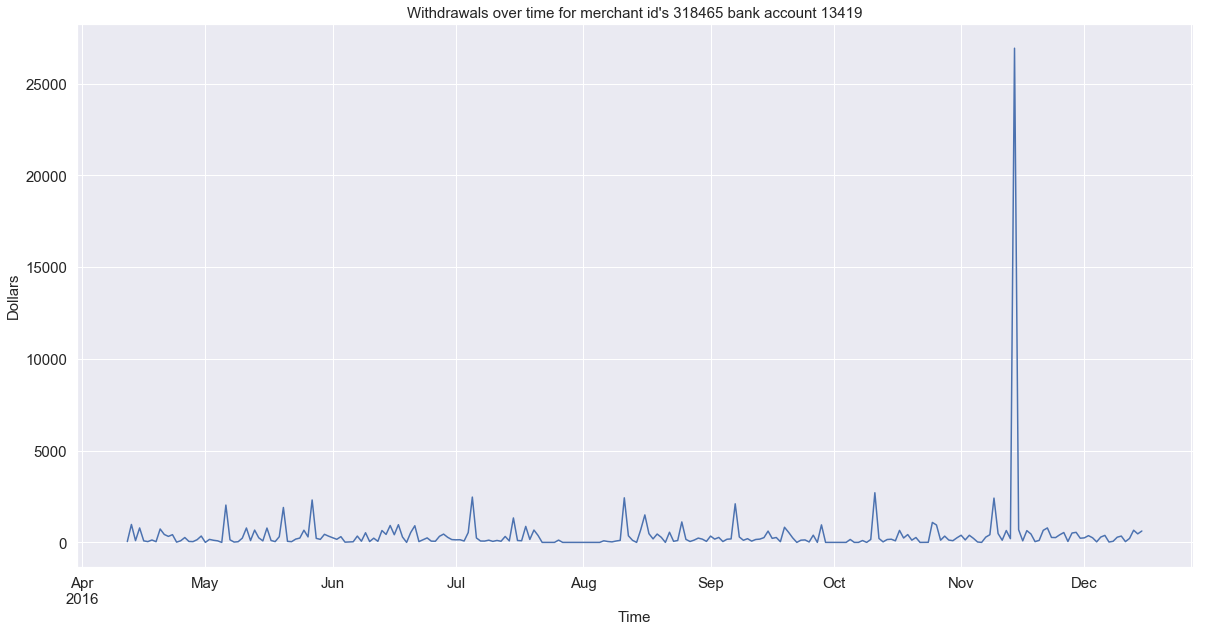

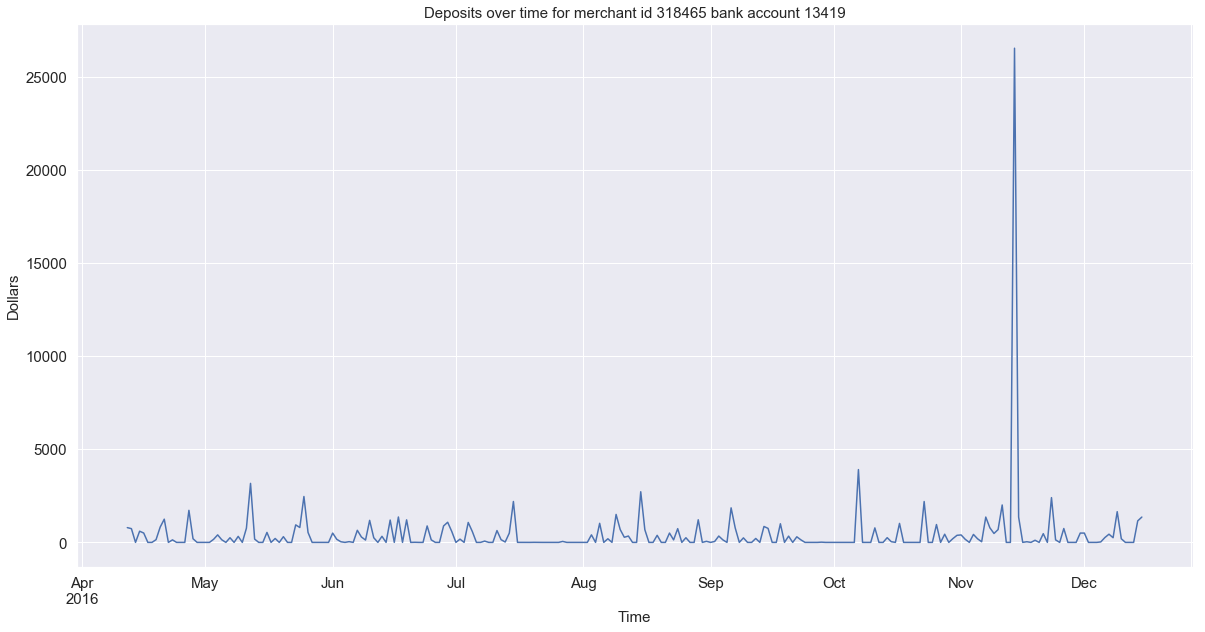

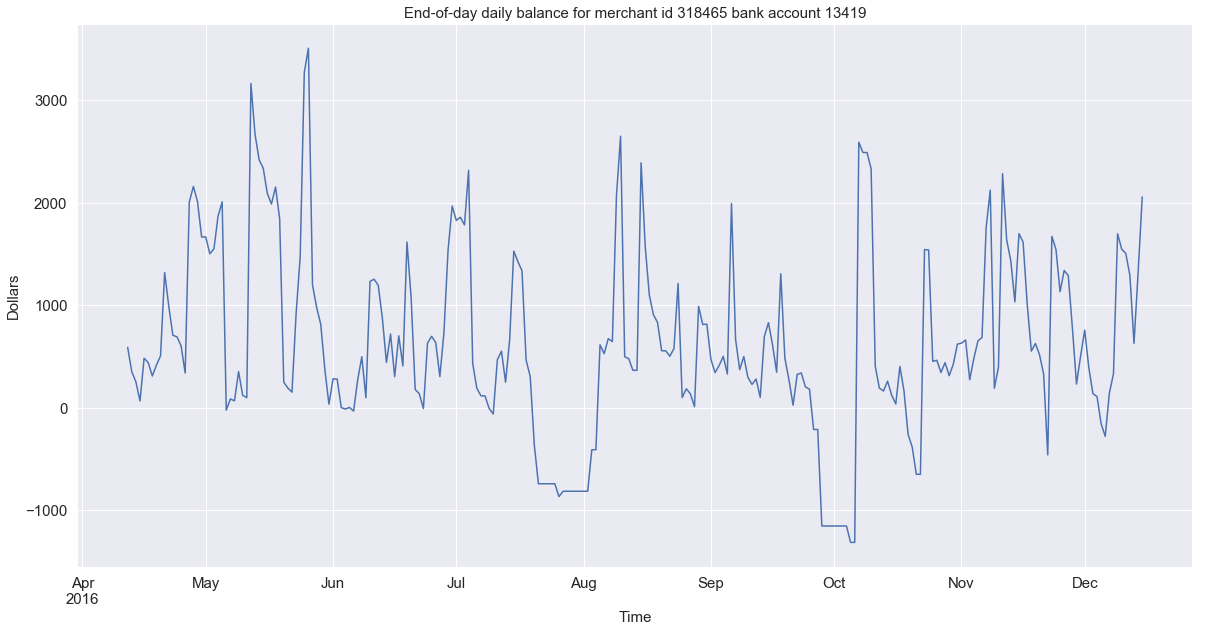

In [30]:
plotting_time_series(318465, 13419)

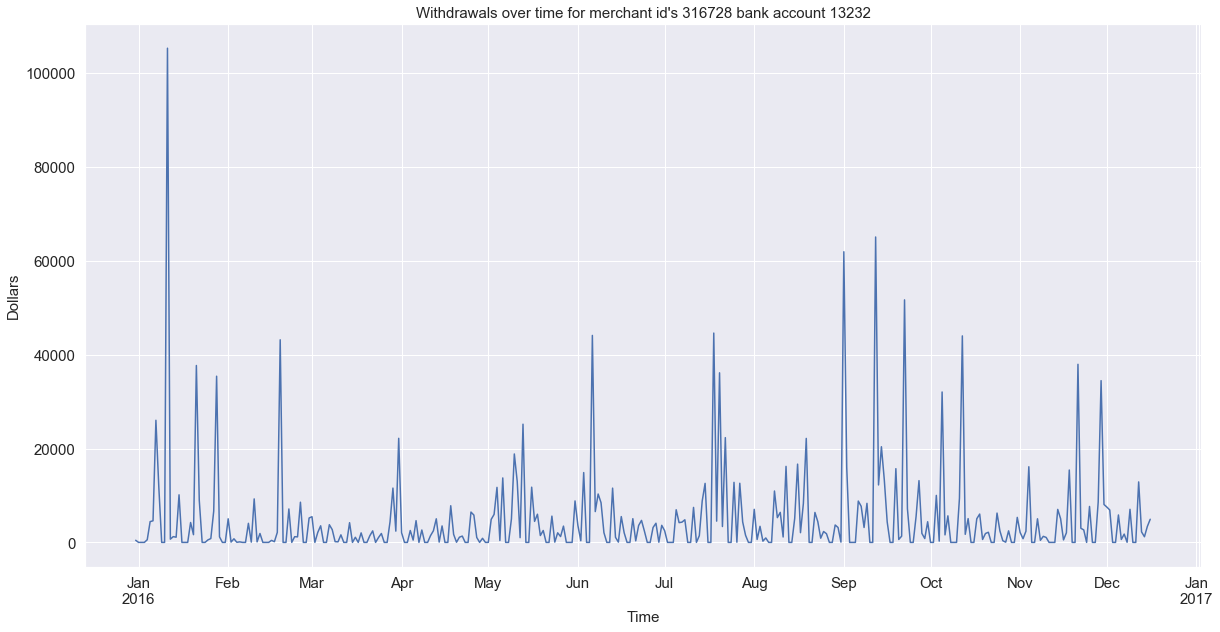

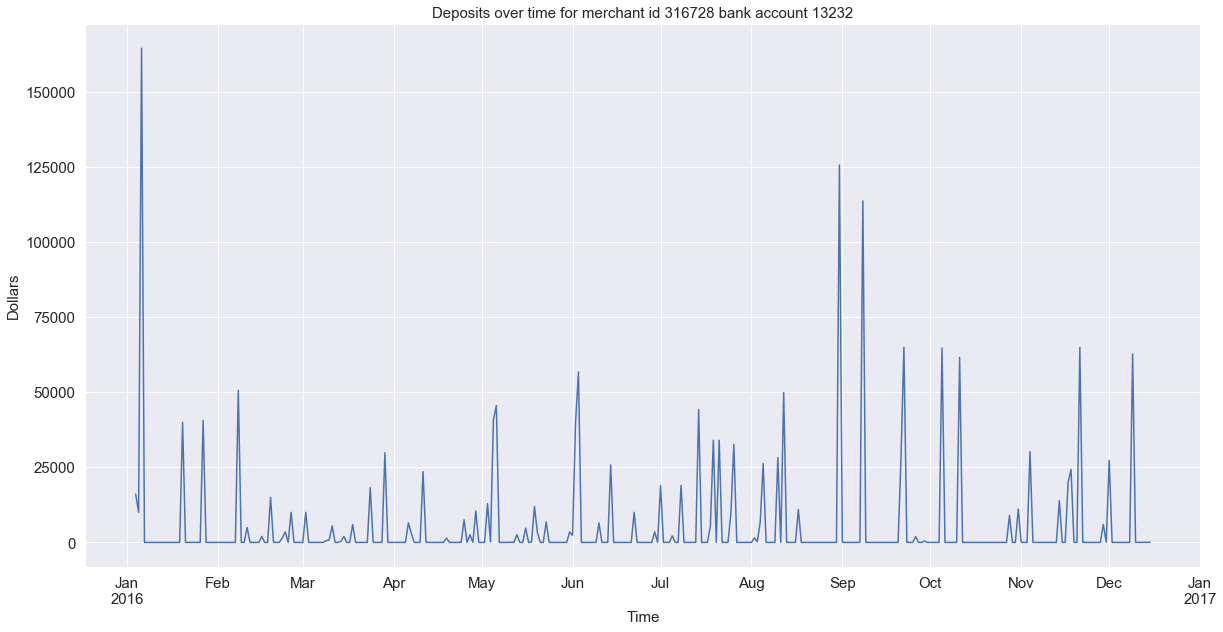

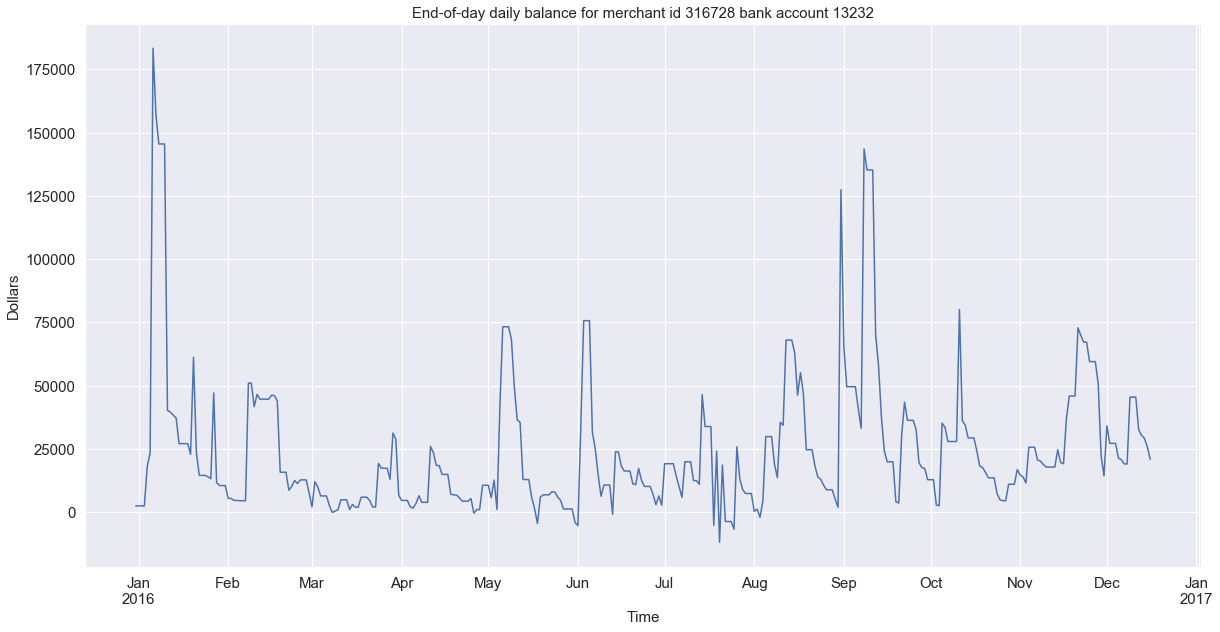

In [31]:
plotting_time_series(316728, 13232)

## Excercise 3

In [32]:
def plotting_time_series_merchant(lead_id):
    sample_df = data[(data['Lead ID']==lead_id)].reset_index(drop=True)

    #Sorting the transaction on the same day
    sample_df = sample_df.sort_values(['post_date', 'trans_order']).set_index('post_date')
    
    srs1 = sample_df[sample_df['transaction_type']=='debit'].resample("D").sum()['amount']#sample_df.groupby([sample_df.index, 'transaction_type']).sum().unstack()['amount'].fillna(0)['debit']
    plot1 = srs1.plot(kind='line', grid=True, figsize = (20,10), fontsize=15)
    plt.xlabel("Time", fontsize=15)
    plt.ylabel("Dollars", fontsize=15)
    plt.title("Withdrawals over time for merchant id %i" %lead_id, fontsize=15)
    plt.savefig('overall_debit_%i.png' %lead_id, bbox_inches='tight')
    plt.show()
    
    srs2 = sample_df[sample_df['transaction_type']=='credit'].resample("D").sum()['amount']#sample_df.groupby([sample_df.index, 'transaction_type']).sum().unstack()['amount'].fillna(0)['credit']
    plot2 = srs2.plot(kind='line', grid=True, figsize = (20,10), fontsize=15)
    plt.xlabel("Time", fontsize=15)
    plt.ylabel("Dollars", fontsize=15)
    plt.title("Deposits over time for merchant id %i" %lead_id, fontsize=15)
    plt.savefig('overall_credit_%i.png' %lead_id, bbox_inches='tight')
    plt.show()
    
    #plot3 = sample_df.groupby(sample_df.index)['running_balance'].sum().plot(kind='line', grid=True, figsize = (20,10),fontsize = 15)
    srs3 = sample_df.groupby([sample_df.index, 'bank_account_id']).agg('last')['running_balance'].reset_index()
    srs3 = srs3.set_index('post_date').resample('D').sum().replace(to_replace=0, method='ffill')['running_balance']
    plot3 = srs3.plot(kind='line', grid=True, figsize = (20,10), fontsize=15)
    plt.ylabel("Dollars", fontsize=15)
    plt.title("End-of-day daily balance for merchant id %i" %lead_id, fontsize=15)
    plt.savefig('overall_balance_%i.png' %lead_id, bbox_inches='tight')
    plt.show()

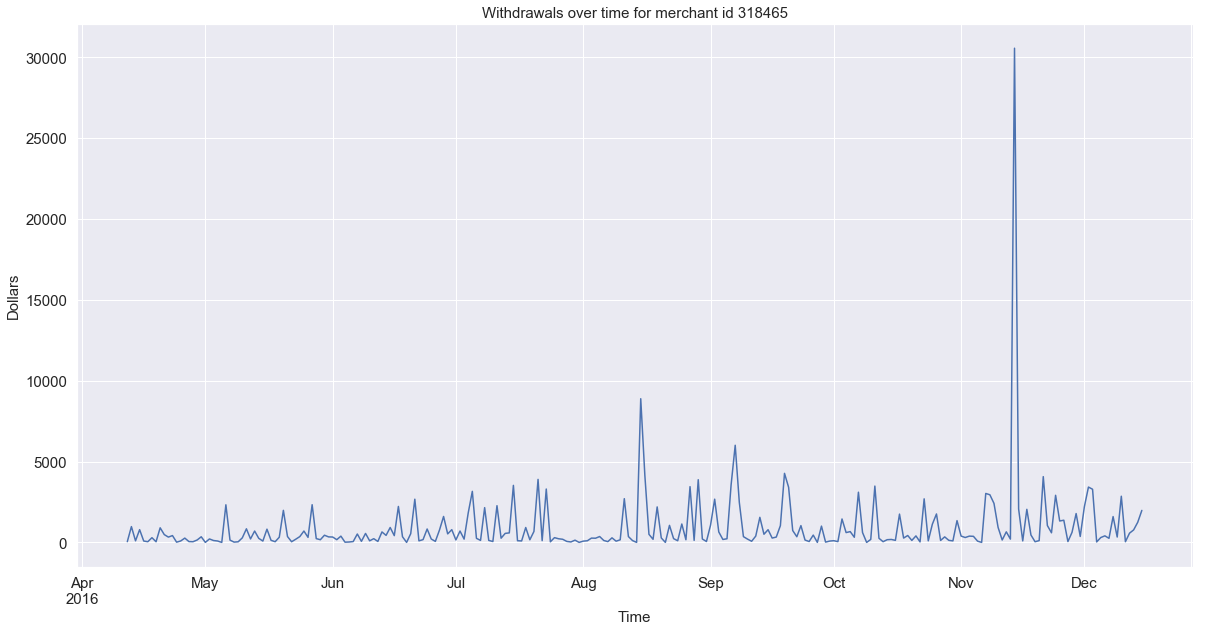

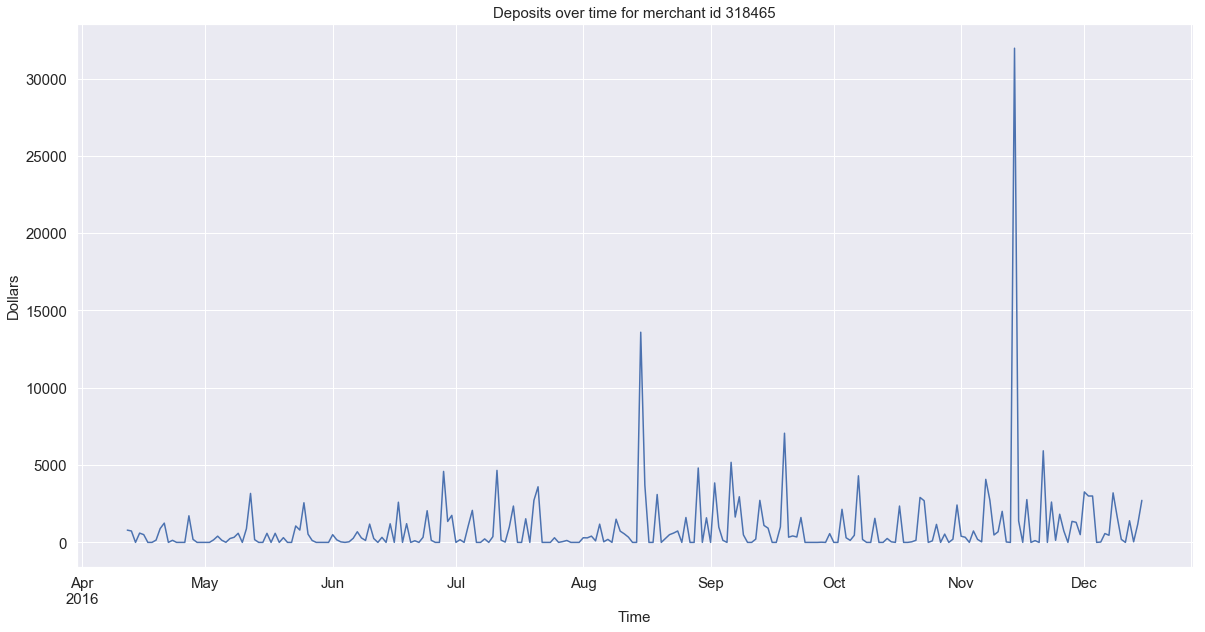

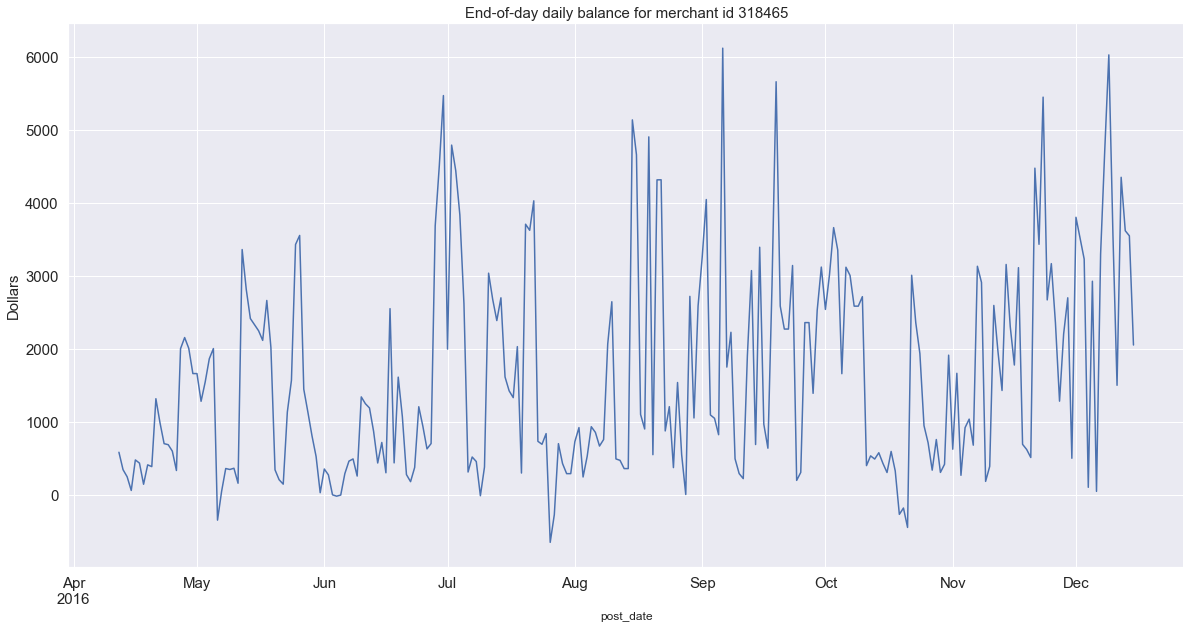

In [33]:
plotting_time_series_merchant(318465)

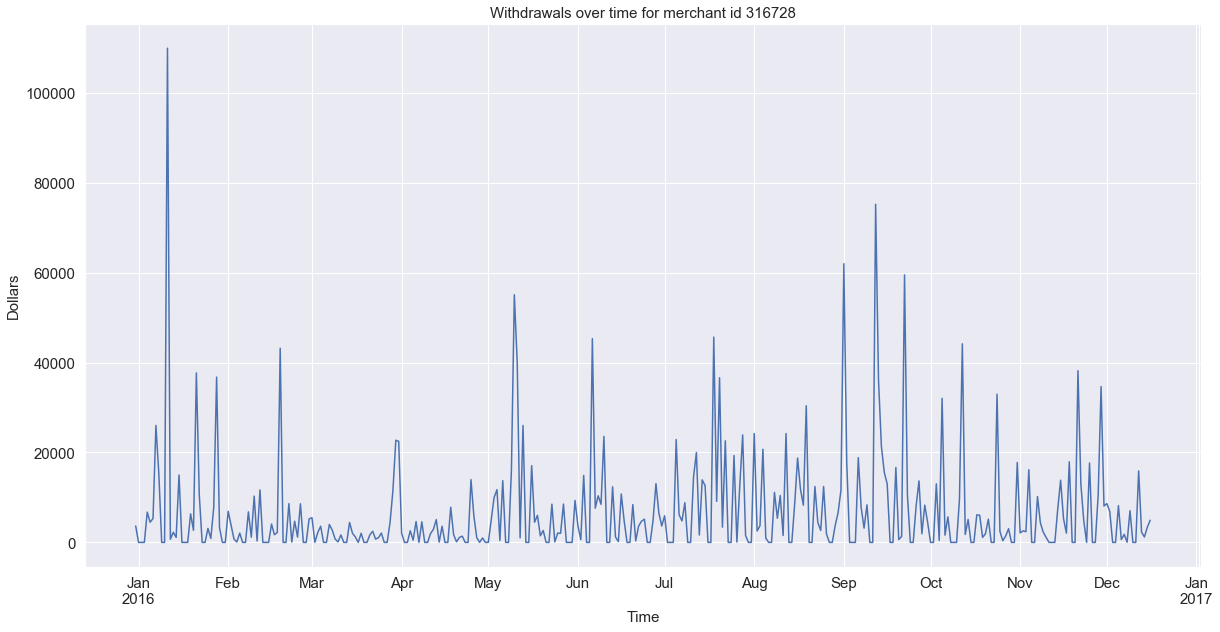

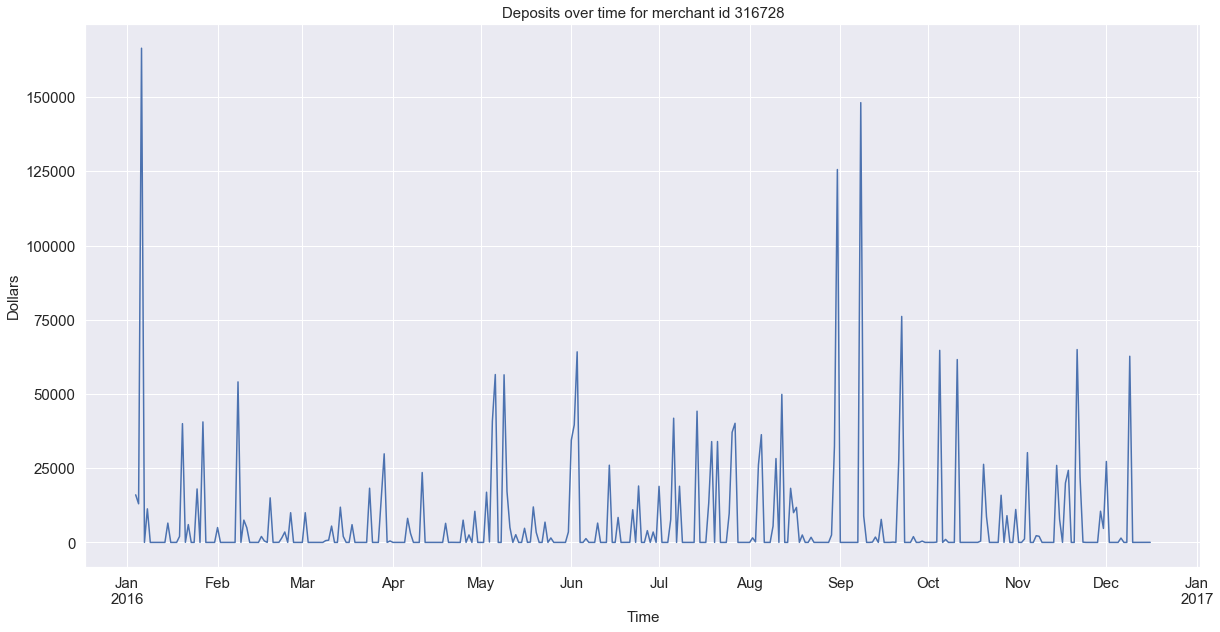

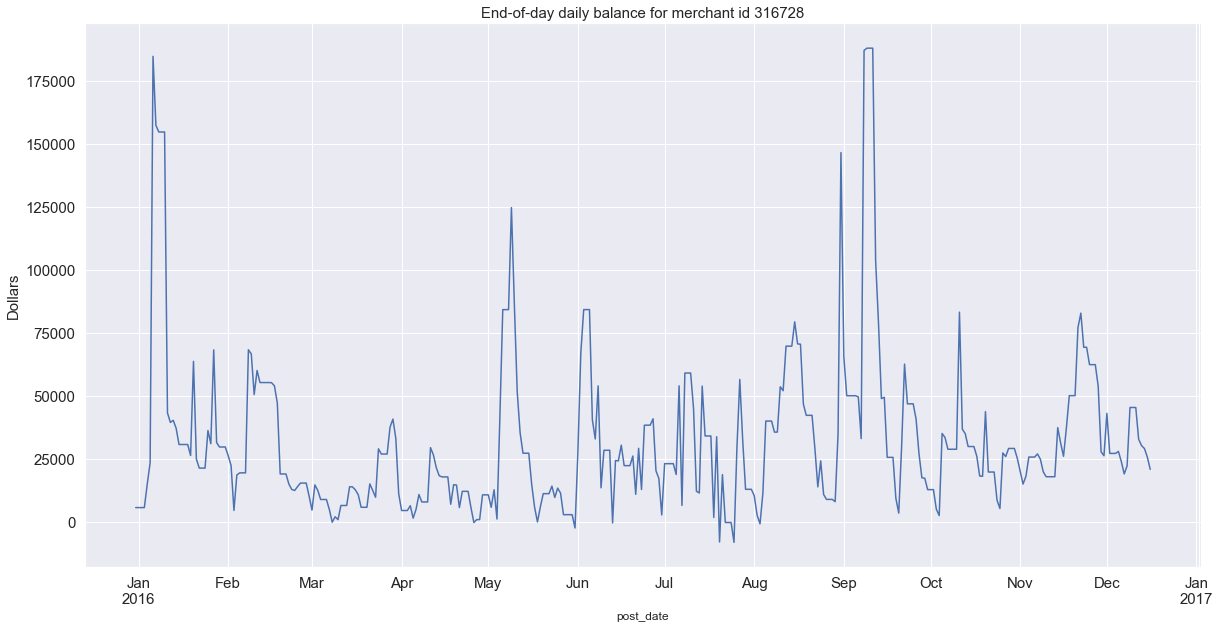

In [34]:
plotting_time_series_merchant(316728)

## Excercise 4

In [35]:
#Finding the Top 5 Deposit for each merchant and taking its sum
temp = pd.DataFrame(data.groupby(['Lead ID', 'transaction_type'])['amount'].apply(lambda x : x.sort_values(ascending=False).head(5)))
top_5_credit = pd.DataFrame(temp.groupby(['Lead ID', 'transaction_type']).sum().unstack()['amount']['credit'])
top_5_credit.columns = ['sum_top_5']

#Total deposit for each merchant aggregated over all bank accounts
total_credit = pd.DataFrame(data.groupby(['Lead ID', 'transaction_type']).agg(sum).unstack()['amount']['credit'])
total_credit.columns = ['total_credit']

#Computing top 5 deposit / total deposit
dimension_1 = top_5_credit.join(total_credit, how='left')
dimension_1['top5_by_total'] = dimension_1['sum_top_5']/dimension_1['total_credit']
dimension_1.sort_values('top5_by_total', ascending=False)

,sum_top_5,total_credit,top5_by_total
Lead ID,,,
325142,288822.92,472617.59,0.611113
310443,197248.99,325133.22,0.606671
321218,716266.77,1444858.49,0.495735
308148,25511.20,66611.03,0.382988
329803,81005.16,219079.29,0.369753
321146,36317.00,105932.46,0.342832
316728,533308.06,2463019.63,0.216526
323253,205969.46,976417.02,0.210944
318465,40435.95,231848.55,0.174407


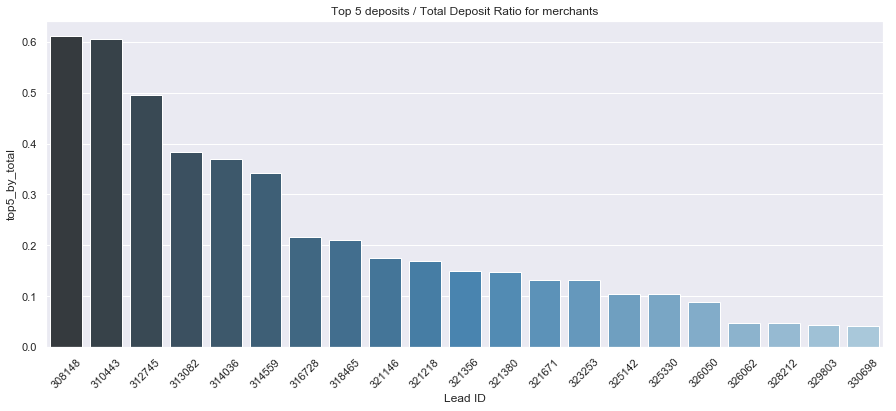

In [36]:
plt.figure(figsize=(15,6)) 
ax = sns.barplot(dimension_1.index, y="top5_by_total", data=dimension_1.sort_values('top5_by_total', ascending=False), 
                 palette="Blues_d")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_title("Top 5 deposits / Total Deposit Ratio for merchants")
plt.savefig('Top5deposit.png', bbox_inches='tight')

Average # of days between two deposit and two withdrawals

In [37]:
data_temp = data.copy()
data_temp['previous_transaction'] = data_temp.groupby(['Lead ID', 'transaction_type'])['post_date'].shift()
data_temp['days_bw_transaction'] = data_temp['post_date'] - data_temp['previous_transaction']
data_temp['days_bw_transaction'] = data_temp['days_bw_transaction'].apply(lambda x : x.days)
data_temp.fillna(0)
avg_days_bw_trans = pd.DataFrame(data_temp.groupby(['Lead ID','transaction_type'])['days_bw_transaction'].agg(np.mean).unstack())
avg_days_bw_trans.columns = ['avg_days_bw_credit', 'avg_days_bw_debit']
avg_days_bw_trans

,avg_days_bw_credit,avg_days_bw_debit
Lead ID,,
308148,1.561404,0.802508
310443,5.000000,0.681633
312745,1.849057,0.489149
313082,2.378378,0.259512
314036,1.130909,0.157762
314559,1.457746,0.667845
316728,0.565657,0.027670
318465,0.671196,0.145895
321146,1.950000,0.487859


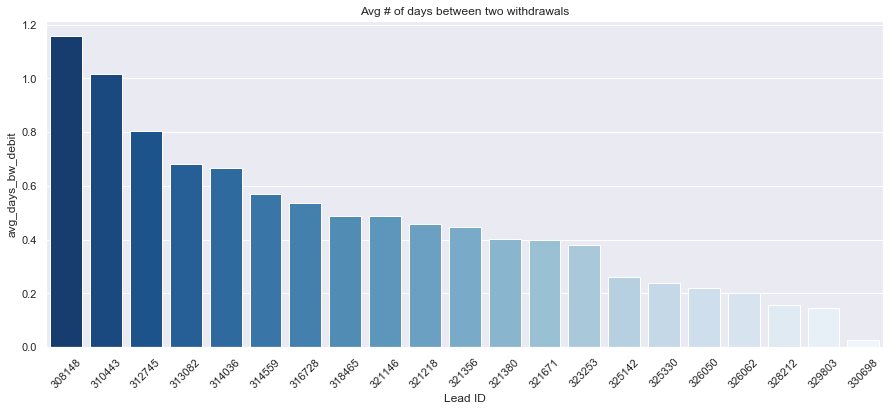

In [38]:
plt.figure(figsize=(15,6)) 
ax = sns.barplot(avg_days_bw_trans.index, y="avg_days_bw_debit", data=avg_days_bw_trans.sort_values('avg_days_bw_debit', ascending=False), 
                 palette="Blues_r")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_title("Avg # of days between two withdrawals")
plt.savefig('avg_days_bw.png', bbox_inches='tight')

Text(0.5,1,'Avg # of days between two deposit')

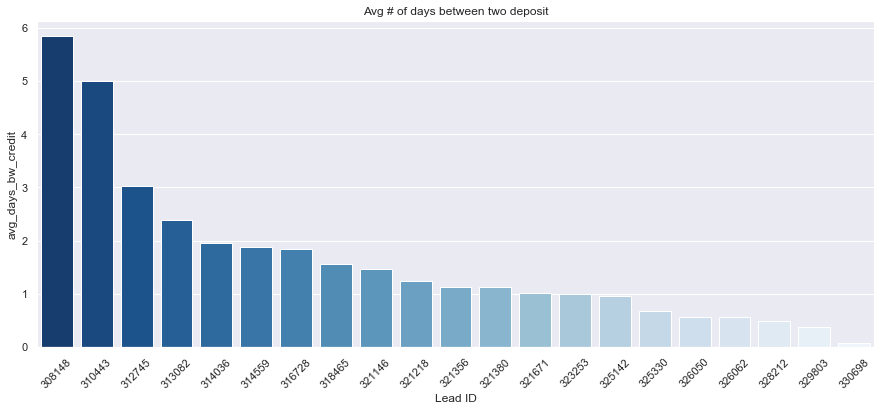

In [39]:
plt.figure(figsize=(15,6)) 
ax = sns.barplot(avg_days_bw_trans.index, y="avg_days_bw_credit", data=avg_days_bw_trans.sort_values('avg_days_bw_credit', ascending=False), 
                 palette="Blues_r")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_title("Avg # of days between two deposit")


Cofficient of variation of the daily balance

In [40]:
temp2 = pd.DataFrame(data.groupby(['Lead ID', 'post_date']).sum()['amount'])
variance_coeff = pd.DataFrame(temp2.groupby('Lead ID')['amount'].apply(lambda x : variation(x)))
variance_coeff.columns = ['variance_coeff']
variance_coeff

,variance_coeff
Lead ID,
308148,1.627860
310443,1.955179
312745,1.216995
313082,1.007112
314036,1.063568
314559,0.953939
316728,1.305985
318465,2.433183
321146,2.706532


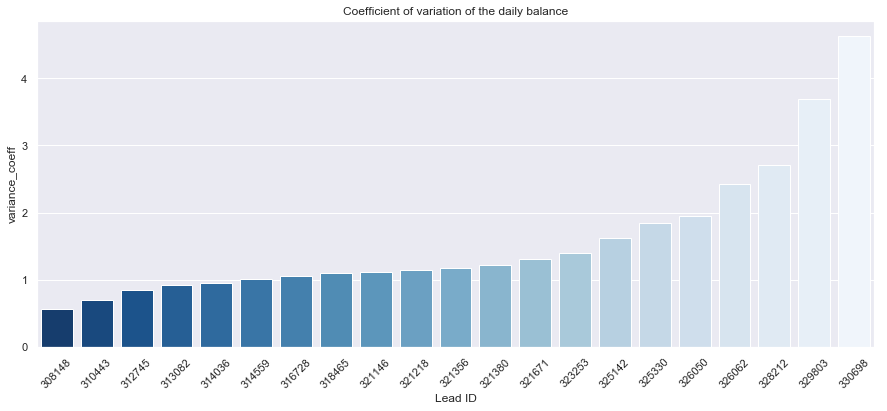

In [41]:
plt.figure(figsize=(15,6)) 
ax = sns.barplot(variance_coeff.index, y="variance_coeff", data=variance_coeff.sort_values('variance_coeff'), 
                 palette="Blues_r")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_title("Coefficient of variation of the daily balance")

plt.savefig('var_coeff.png', bbox_inches='tight')

## Other Variable, 
### Top 5 withdrawal/Total Withdrawal (lower the better)


In [42]:
#Finding the Top 5 withdrawal for each merchant and taking its sum
temp = pd.DataFrame(data.groupby(['Lead ID', 'transaction_type'])['amount'].apply(lambda x : x.sort_values(ascending=False).head(5)))
top_5_credit = pd.DataFrame(temp.groupby(['Lead ID', 'transaction_type']).sum().unstack()['amount']['debit'])
top_5_credit.columns = ['sum_top_5']

#Total withdrawal for each merchant aggregated over all bank accounts
total_credit = pd.DataFrame(data.groupby(['Lead ID', 'transaction_type']).agg(sum).unstack()['amount']['debit'])
total_credit.columns = ['total_debit']

#Computing top 5 debit / total debit
dimension_2 = top_5_credit.join(total_credit, how='left')
dimension_2['top5_by_total'] = dimension_2['sum_top_5']/dimension_2['total_debit']
dimension_2

,sum_top_5,total_debit,top5_by_total
Lead ID,,,
308148,13868.00,61799.63,0.224403
310443,106543.60,346662.04,0.307341
312745,87810.47,713250.53,0.123113
313082,46006.28,558877.28,0.082319
314036,43717.33,432974.81,0.100970
314559,89154.00,519814.25,0.171511
316728,279956.89,2415843.54,0.115884
318465,40698.26,229560.94,0.177287
321146,35775.00,100592.42,0.355643


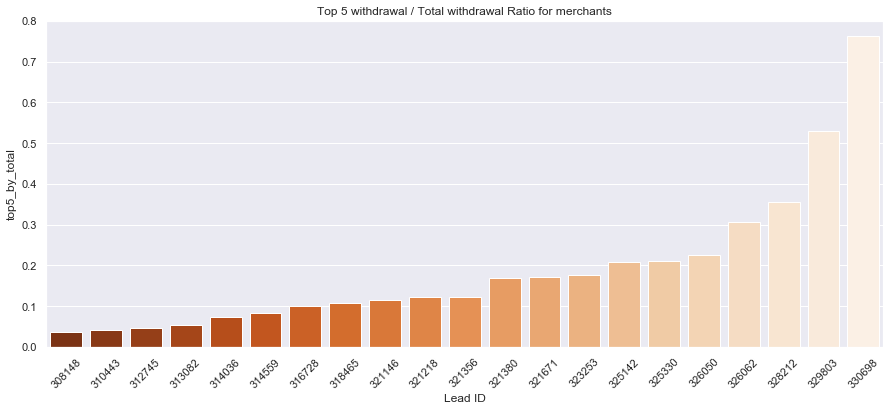

In [43]:
plt.figure(figsize=(15,6)) 
ax = sns.barplot(dimension_2.index, y="top5_by_total", data=dimension_2.sort_values('top5_by_total'), 
                 palette="Oranges_r")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_title("Top 5 withdrawal / Total withdrawal Ratio for merchants")

plt.savefig('top_5_withdraw.png', bbox_inches='tight')

### Average No. of times per month the balance becomes less than or equal to zero for a merchant

In [44]:
bal_equal_0 = data.groupby(['Lead ID', 'post_date'])['running_balance'].apply(lambda x : x<=0)
data_copy = data.copy()
data_copy['bal_eq_0'] = bal_equal_0
Bal_equal_0_avg_month = pd.DataFrame(data_copy.set_index('post_date').groupby(['Lead ID', pd.Grouper(freq='M')])['bal_eq_0'].sum().groupby('Lead ID').mean())
Bal_equal_0_avg_month.columns = ['bal_eq_less_0']
Bal_equal_0_avg_month

,bal_eq_less_0
Lead ID,
308148,2.200000
310443,0.000000
312745,2.000000
313082,8.800000
314036,17.090909
314559,0.000000
316728,6.000000
318465,27.777778
321146,27.111111


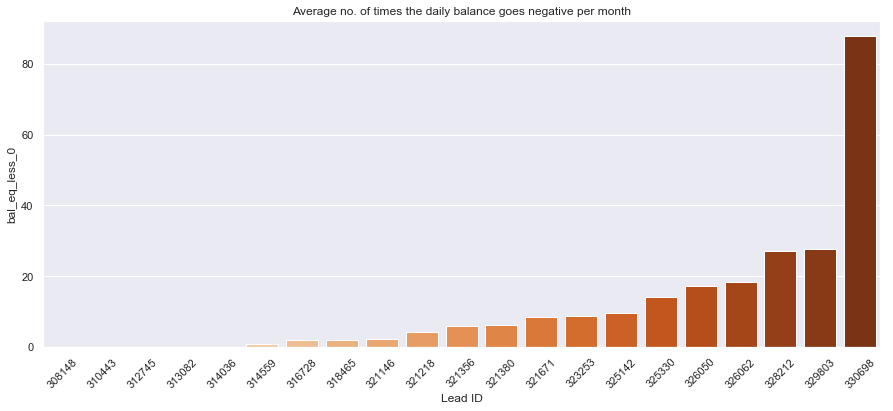

In [45]:
plt.figure(figsize=(15,6)) 
ax = sns.barplot(Bal_equal_0_avg_month.index, y="bal_eq_less_0", data=Bal_equal_0_avg_month.sort_values('bal_eq_less_0'), 
                 palette="Oranges")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_title("Average no. of times the daily balance goes negative per month")
plt.savefig('Below_0.png', bbox_inches='tight')

### Average monthly & weekly balance for each merchant

In [46]:
Avg_balance = pd.DataFrame(data_copy.set_index('post_date').groupby(['Lead ID', pd.Grouper(freq='M')])['running_balance'].mean().groupby(['Lead ID']).mean())
Avg_balance.columns = ['Avg_bal_per_month']

In [47]:
avg_bal_per_week = data_copy.set_index('post_date').groupby(['Lead ID', pd.Grouper(freq='W-MON')])['running_balance'].mean().groupby(['Lead ID']).mean()
Avg_balance['Avg_bal_per_week'] = avg_bal_per_week
Avg_balance.sort_values('Avg_bal_per_month', ascending= False, inplace=True)

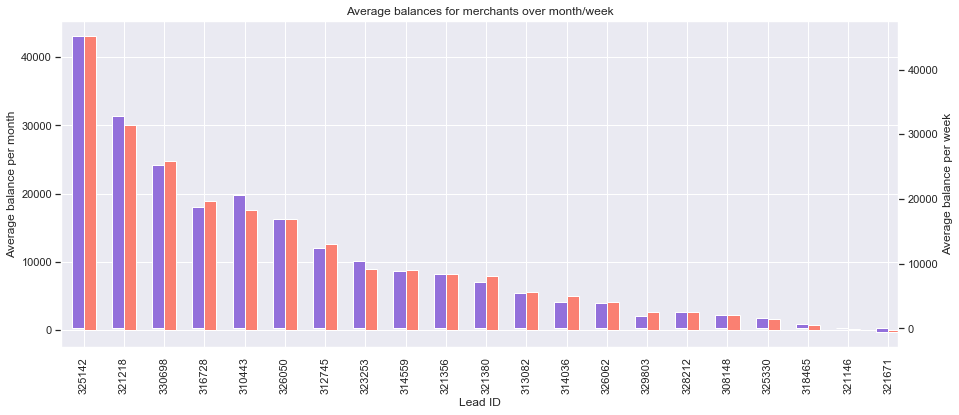

In [48]:
fig = plt.figure(figsize=(15,6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

Avg_balance.Avg_bal_per_month.plot(kind='bar',color='salmon',ax=ax,width=width, position=0)
Avg_balance.Avg_bal_per_week.plot(kind='bar',color='mediumpurple', ax=ax2,width = width,position=1)

ax.grid(None, axis=1)
ax2.grid(None)

ax.set_ylabel('Average balance per month')
ax2.set_ylabel('Average balance per week')
plt.title("Average balances for merchants over month/week")
plt.savefig('Avg_bal.png', bbox_inches='tight')
#ax.set_xlim(-1,7)

## Modeling

To deal with the text description, converted it into vectors making it possible to include that in the model. Then performed one-hot encoding on the categorical data like Industry and transaction type. 

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=10,token_pattern=r'\b[^\d\Wx{3,}.\s]+[a-zA-Z]{3}\b', stop_words='english')
vect.fit(data['description'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=10,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None,
        token_pattern='\\b[^\\d\\Wx{3,}.\\s]+[a-zA-Z]{3}\\b',
        tokenizer=None, vocabulary=None)

In [50]:
print(vect.get_feature_names())

['aarna', 'acceptance', 'account', 'acct', 'achppd', 'acme', 'acropro', 'activity', 'adelphi', 'adjustment', 'adobe', 'adore', 'adtpapach', 'advance', 'advantage', 'advocare', 'agentresid', 'airbrus', 'airport', 'airtime', 'albe', 'aldelo', 'alderw', 'alderwood', 'alhayen', 'allentown', 'altadis', 'alyaa', 'amazon', 'america', 'american', 'amex', 'amzn', 'analysis', 'angeles', 'annapolis', 'arco', 'arlans', 'arms', 'arvada', 'associate', 'aurora', 'authnet', 'author', 'authorized', 'auto', 'autopay', 'autozone', 'avenue', 'backwoods', 'bakery', 'balance', 'ballinger', 'baltimore', 'bank', 'bankcard', 'bankcd', 'banking', 'bard', 'bargain', 'bartell', 'base', 'batch', 'becu', 'bell', 'belle', 'bellevue', 'bellevuewa', 'bellisimo', 'belmont', 'bematech', 'best', 'bethpage', 'billing', 'billpayfee', 'billsppd', 'billw', 'billwa', 'billwau', 'biwa', 'biwaus', 'bkcd', 'bkofamerica', 'bladensburg', 'block', 'bloomnet', 'blossom', 'blvd', 'bnkcd', 'boardequalizatio', 'bobcat', 'bofa', 'bothel

In [51]:
len(vect.vocabulary_)

861

In [52]:
data_temp = data.copy()

In [53]:
vectors = vect.fit_transform(data['description'])
vec_df = pd.DataFrame(vectors.todense(), columns=vect.get_feature_names())
data_temp = pd.concat([data_temp, vec_df], axis=1)
data_temp = pd.concat([data_temp, pd.get_dummies(data_temp.Industry)],axis=1)

In [54]:
data_temp['transaction_type'] = data_temp['transaction_type'].astype('category')
data_temp['transaction_type_code'] = data_temp['transaction_type'].cat.codes
data_temp.drop(['Lead ID', 'bankid', 'bank_account_id', 'account_number','Industry', 'transaction_type', 'description', 'trans_order'], 
               axis=1, inplace=True)

In [55]:
data_temp.head()

,post_date,amount,running_balance,aarna,acceptance,account,acct,achppd,acme,acropro,...,"Agriculture, Forestry, Fishing and Hunting",Construction,Educational Services,Finance and Insurance,Health Care and Social Assistance,Information Technology,Other Services (except Public Administration),"Professional, Scientific, and Technical Services",Retail Trade,transaction_type_code
0,2016-03-10,5000.00,5671.40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016-03-21,16.00,5687.40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016-03-21,1000.00,5671.90,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016-03-21,1015.50,4671.90,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2016-03-22,27.62,5644.28,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Model Building

Since, we had more than 800 features after vectorization, we performed PCA in order to reduce the dimensionality of the data. Then plotting the scree diagram, selected 300 principal components as it explain 75% of the variance in the data. 
Then perfored K-means clustering on the 300 features(PCs) data to cluster it into 2 cluster. 

In [56]:
data_temp['day_of_week'] = data_temp['post_date'].dt.day_name()
data_temp = pd.concat([data_temp, pd.get_dummies(data_temp.day_of_week)],axis=1)
data_temp.drop('day_of_week', axis=1, inplace=True)
data_temp

,post_date,amount,running_balance,aarna,acceptance,account,acct,achppd,acme,acropro,...,"Professional, Scientific, and Technical Services",Retail Trade,transaction_type_code,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2016-03-10,5000.00,5671.40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2016-03-21,16.00,5687.40,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2016-03-21,1000.00,5671.90,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2016-03-21,1015.50,4671.90,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,2016-03-22,27.62,5644.28,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,2016-03-23,3.24,5641.04,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,2016-03-24,6.48,4178.68,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
7,2016-03-24,1200.00,4441.04,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
8,2016-03-24,255.88,4185.16,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
9,2016-03-28,21.90,2706.78,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [57]:
data_temp.shape

(29029, 882)

In [58]:
X=data_temp.drop('post_date', axis=1)

In [59]:
X = data_temp.drop('post_date', axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 0.41239411, -0.22819122, -0.02475648, ...,  2.36907756,
        -0.50758906, -0.43852361],
       [-0.25655337, -0.22739343, -0.02475648, ..., -0.42210522,
        -0.50758906, -0.43852361],
       [-0.12448188, -0.22816629, -0.02475648, ..., -0.42210522,
        -0.50758906, -0.43852361],
       ...,
       [ 2.37867559,  1.43375088, -0.02475648, ..., -0.42210522,
         1.97009763, -0.43852361],
       [-0.16413688,  2.41352995, -0.02475648, ..., -0.42210522,
         1.97009763, -0.43852361],
       [ 1.32764554,  0.32586178, -0.02475648, ..., -0.42210522,
         1.97009763, -0.43852361]])

In [60]:
X.shape

(29029, 881)

In [61]:
from sklearn.decomposition import PCA
pca = PCA()
pca_result = pca.fit_transform(X)

In [62]:
pca.explained_variance_

array([6.15076476e+00, 5.67520679e+00, 5.29590671e+00, 5.01083769e+00,
       4.97249352e+00, 4.72640959e+00, 4.39521797e+00, 4.24120543e+00,
       4.20713153e+00, 4.10985126e+00, 4.02840188e+00, 3.95081348e+00,
       3.91829853e+00, 3.90009374e+00, 3.87279929e+00, 3.86507995e+00,
       3.76788714e+00, 3.71231574e+00, 3.62383581e+00, 3.56450688e+00,
       3.49932021e+00, 3.42979105e+00, 3.41583678e+00, 3.39837285e+00,
       3.37999562e+00, 3.35298135e+00, 3.30783885e+00, 3.26931528e+00,
       3.24408609e+00, 3.23933197e+00, 3.17817554e+00, 3.14078879e+00,
       3.09448635e+00, 3.06317008e+00, 3.04886594e+00, 3.03418285e+00,
       3.01676134e+00, 2.99919718e+00, 2.98609996e+00, 2.95174495e+00,
       2.93909135e+00, 2.93607797e+00, 2.89912507e+00, 2.86693098e+00,
       2.84446095e+00, 2.83941331e+00, 2.81893074e+00, 2.78973273e+00,
       2.78527621e+00, 2.78053706e+00, 2.76964560e+00, 2.75300304e+00,
       2.74540499e+00, 2.73624433e+00, 2.72975919e+00, 2.71517526e+00,
      

In [63]:
pca.components_.shape

(881, 881)

In [64]:
pca.get_covariance()

array([[ 1.00003445e+00,  1.81646261e-01, -4.10016003e-03, ...,
         1.10303554e-02,  1.43884134e-02,  1.45435697e-03],
       [ 1.81646261e-01,  1.00003445e+00,  7.06716596e-03, ...,
         5.02050924e-03,  9.46125342e-03, -1.93517989e-02],
       [-4.10016003e-03,  7.06716596e-03,  1.00003445e+00, ...,
         1.25838795e-02,  1.06476287e-03, -8.84411732e-04],
       ...,
       [ 1.10303554e-02,  5.02050924e-03,  1.25838795e-02, ...,
         1.00003445e+00, -2.14263371e-01, -1.85109479e-01],
       [ 1.43884134e-02,  9.46125342e-03,  1.06476287e-03, ...,
        -2.14263371e-01,  1.00003445e+00, -2.22597452e-01],
       [ 1.45435697e-03, -1.93517989e-02, -8.84411732e-04, ...,
        -1.85109479e-01, -2.22597452e-01,  1.00003445e+00]])

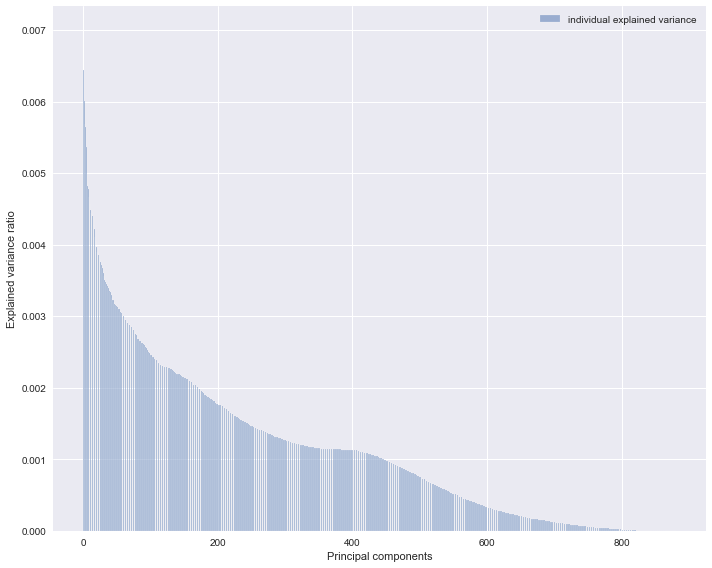

In [65]:
explained_variance=pca.explained_variance_ratio_
with plt.style.context('seaborn'):
    plt.figure(figsize=(10, 8))

    plt.bar(range(int(X.shape[1])), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

#plt.savefig('variance_pca.png')

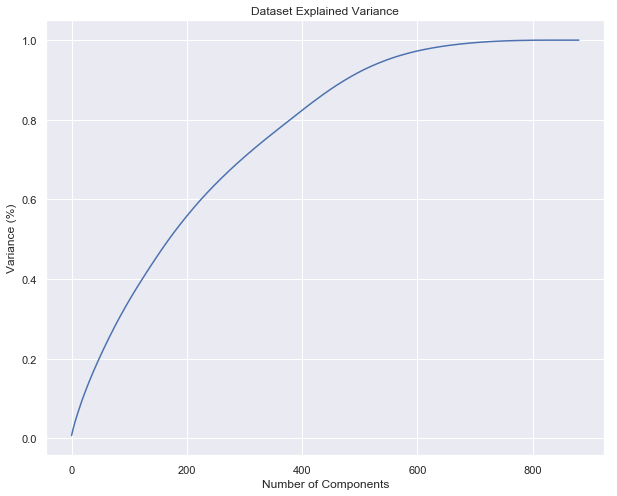

In [66]:
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
#plt.savefig('scree_diagram.png')
plt.show()


Approximately, 75% of variance in the data is expalined by 300 principal components. So we reduce the dimension of the data fom ~800 features to ~300 principal components.

In [67]:
pca = PCA(n_components=300)
pca_result = pca.fit_transform(X)

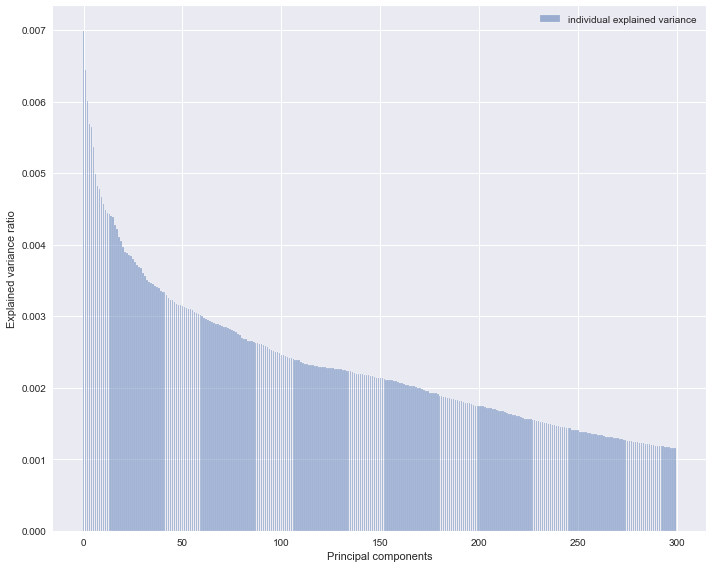

In [68]:
explained_variance=pca.explained_variance_ratio_
with plt.style.context('seaborn'):
    plt.figure(figsize=(10, 8))

    plt.bar(range(pca_result.shape[1]), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

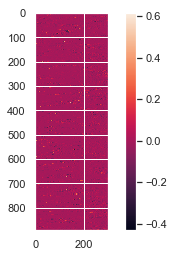

In [619]:
components = pca.components_
#fig = plt.figure(figsize=(10,30))
plt.imshow(components.T)
#plt.yticks(range(len(data_temp.drop('post_date', axis=1).columns)),data_temp.drop('post_date', axis=1).columns )
plt.colorbar()

In [69]:
pca.components_.shape

(300, 881)

In [70]:
pca_result.shape

(29029, 300)

In [71]:
pca_comp1 = pca.components_[1,:].tolist()
pca_comp2 = pca.components_[2,:].tolist()
pca_comp3 = pca.components_[3,:].tolist()
pca_comp4 = pca.components_[4,:].tolist()
pca_comp5 = pca.components_[5,:].tolist()

In [72]:
feature_name = data_temp.drop('post_date', axis=1).columns.tolist()

In [73]:
pca_feature_imp = pd.DataFrame({'features':feature_name, 
                                'weights_1' : pca_comp1,
                                'weights_2' : pca_comp2,
                               'weights_3' : pca_comp3,
                               'weights_4' : pca_comp4,
                               'weights_5' : pca_comp5})
pca_feature_imp

,features,weights_1,weights_2,weights_3,weights_4,weights_5
0,amount,0.039187,0.160466,0.012315,-0.111347,0.019534
1,running_balance,0.034379,0.055651,0.011800,-0.075591,-0.005665
2,aarna,0.000419,-0.000010,0.000099,-0.001162,-0.003417
3,acceptance,-0.000442,-0.008954,0.003598,0.000421,-0.008709
4,account,-0.010473,0.000482,-0.005851,-0.008533,0.012717
5,acct,0.000234,-0.003861,0.002120,-0.002818,-0.002743
6,achppd,-0.000271,-0.004317,0.002739,-0.002685,-0.002598
7,acme,0.001055,-0.005872,0.000571,-0.000135,-0.002206
8,acropro,0.000998,-0.012393,0.002058,-0.003490,-0.001059
9,activity,-0.011128,-0.039547,0.026071,-0.016034,-0.039202


In [74]:
for i in range(5):
    top_5 = pca_feature_imp.sort_values('weights_%i'%(i+1), ascending=False)[:5]['features'].tolist()
    lower_5 = pca_feature_imp.sort_values('weights_%i'%(i+1))[:5]['features'].tolist()
    top = top_5+lower_5
    print("The features with highest weight values for component %i are " %(i+1), top,"\n")

The features with highest weight values for component 1 are  ['wfbt', 'transfirst', 'stlmt', 'bkcd', 'breakfast', 'Finance and Insurance', 'worldpay', 'famil', 'crystal', 'lake'] 

The features with highest weight values for component 2 are  ['persona', 'doctors', 'author', 'bankcard', 'newlogic', 'transaction_type_code', 'purchase', 'Retail Trade', 'card', 'check'] 

The features with highest weight values for component 3 are  ['trade', 'bofa', 'world', 'svcs', 'group', 'Finance and Insurance', 'worldpay', 'ending', 'indn', 'waus'] 

The features with highest weight values for component 4 are  ['ending', 'indn', 'worldpay', 'trade', 'bofa', 'transfer', 'checking', 'business', 'datta', 'Other Services (except Public Administration)'] 

The features with highest weight values for component 5 are  ['transfer', 'business', 'checking', 'datta', 'online', 'Retail Trade', 'persona', 'doctors', 'bankcard', 'author'] 



In [636]:
tsne_results.shape

(10000, 2)

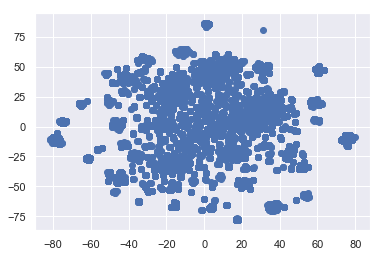

In [637]:
plt.scatter(tsne_results[:,0], tsne_results[:,1])

#### Applying K-Means on the data

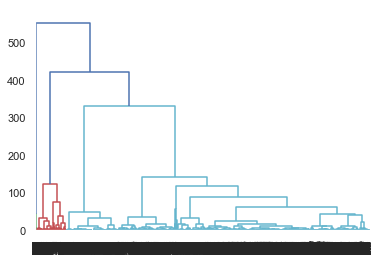

In [78]:
import scipy.cluster.hierarchy as sch
X1 = pca_result[:,[0,1]]
dendrogram = sch.dendrogram(sch.linkage(X1, method='ward'))

In [643]:
from sklearn.cluster import KMeans
true_k =20
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000, n_init=50)
model.fit(tsne_results)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=20, n_init=50, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [80]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')
model.fit(pca_result)
#labels = model.labels_

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func=<function mean at 0x10838a950>)

In [725]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=7, min_samples=15).fit(tsne_results)

In [77]:
len(np.unique(model.labels_))

2

In [83]:
len(model.labels_)

29029

In [97]:
model.labels_.shape = (29029,)

No handles with labels found to put in legend.


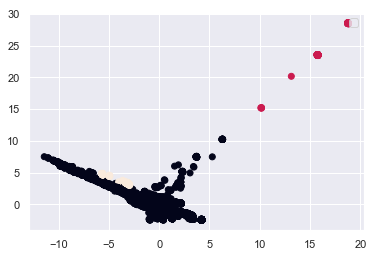

In [81]:
plt.scatter(pca_result[:, 0],pca_result[:, 1], c=model.labels_)
plt.savefig('plot1.png')
plt.legend(loc='best')


No handles with labels found to put in legend.


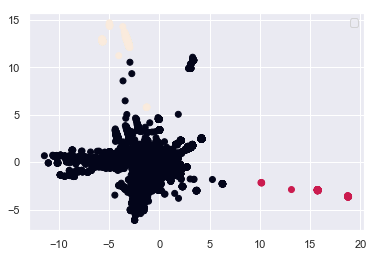

In [98]:
plt.scatter(pca_result[:, 0],pca_result[:, 2], c=model.labels_)
plt.savefig('plot2.png')
plt.legend(loc='best')

No handles with labels found to put in legend.


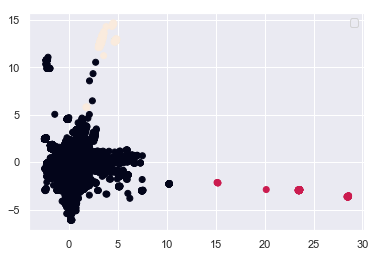

In [99]:
plt.scatter(pca_result[:, 1],pca_result[:, 2], c=model.labels_)
plt.savefig('plot3.png')
plt.legend(loc='best')

In [84]:
Y_pca = model.labels_
Y_pca.shape

(29029,)

In [85]:
Y_pca = model.labels_
Y_pca.shape = (29029,1)
clustered_pca = np.concatenate((pca_result, Y_pca), axis = 1)

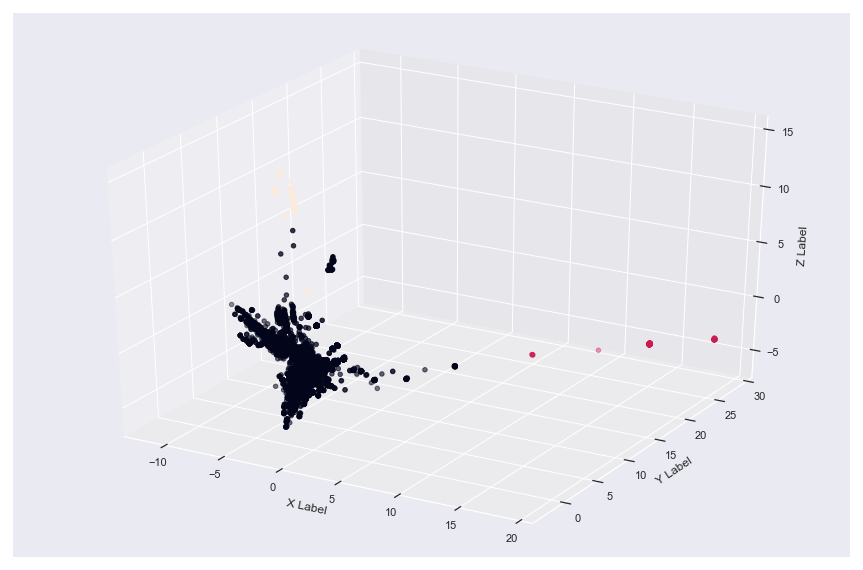

In [86]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(clustered_pca[:, 0], clustered_pca[:, 1],clustered_pca[:,2], c = clustered_pca[:,-1])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.savefig('3dplot.png')
plt.show()

In [89]:
data_clustered = data.copy()
data_clustered['cluster'] = Y_pca

In [90]:
data_clustered

,Lead ID,bankid,bank_account_id,account_number,Industry,post_date,description,transaction_type,amount,running_balance,trans_order,cluster
0,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-10,DEPOSIT ID NUMBER xx6836,credit,5000.00,5671.40,1,0
1,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-21,ATM CASH DEPOSIT 03/21 2904 N BELT LINE RD IRV...,credit,16.00,5687.40,1,0
2,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-21,ATM CASH DEPOSIT 03/21 2904 N BELT LINE RD IRV...,credit,1000.00,5671.90,3,0
3,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-21,WAL-MART #0880 IRVING TXxx6007 03/20,debit,1015.50,4671.90,2,0
4,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-22,CHECK OR SUPPLY ORDERPPD ID: xxxxxx6800,debit,27.62,5644.28,1,0
5,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-23,DOLLARTREE LEAGUE CITY TXxx0062 03/23,debit,3.24,5641.04,1,0
6,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-24,OREILLY AUTO xxxx4119 SEABROOKTX 03/23,debit,6.48,4178.68,3,0
7,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-24,WITHDRAWAL,debit,1200.00,4441.04,1,0
8,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-24,WM SUPERCENTER # Wal-M LEAGUE CITY TXxx0557 03/24,debit,255.88,4185.16,2,0
9,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-28,Wal-Mart Super Center FRIENDSWOOD TX xx9384 03/28,debit,21.90,2706.78,2,0


In [113]:
data_clustered[(data_clustered['Lead ID']==308148) & (data_clustered['cluster']==0) ]

,Lead ID,bankid,bank_account_id,account_number,Industry,post_date,description,transaction_type,amount,running_balance,trans_order,cluster
0,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-10,DEPOSIT ID NUMBER xx6836,credit,5000.00,5671.40,1,0
1,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-21,ATM CASH DEPOSIT 03/21 2904 N BELT LINE RD IRV...,credit,16.00,5687.40,1,0
2,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-21,ATM CASH DEPOSIT 03/21 2904 N BELT LINE RD IRV...,credit,1000.00,5671.90,3,0
3,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-21,WAL-MART #0880 IRVING TXxx6007 03/20,debit,1015.50,4671.90,2,0
4,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-22,CHECK OR SUPPLY ORDERPPD ID: xxxxxx6800,debit,27.62,5644.28,1,0
5,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-23,DOLLARTREE LEAGUE CITY TXxx0062 03/23,debit,3.24,5641.04,1,0
6,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-24,OREILLY AUTO xxxx4119 SEABROOKTX 03/23,debit,6.48,4178.68,3,0
7,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-24,WITHDRAWAL,debit,1200.00,4441.04,1,0
8,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-24,WM SUPERCENTER # Wal-M LEAGUE CITY TXxx0557 03/24,debit,255.88,4185.16,2,0
9,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-28,Wal-Mart Super Center FRIENDSWOOD TX xx9384 03/28,debit,21.90,2706.78,2,0


# Text Embedding GLoVE

In [6]:
!pip install glove_python

  Using cached https://files.pythonhosted.org/packages/3e/79/7e7e548dd9dcb741935d031117f4bed133276c2a047aadad42f1552d1771/glove_python-0.1.0.tar.gz
  ERROR: Command errored out with exit status 1:
   command: /Users/sumeetkotaria/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/77/1d1hdlsd6ld0nnzf330b5ds00000gn/T/pip-install-czu3_ct5/glove-python/setup.py'"'"'; __file__='"'"'/private/var/folders/77/1d1hdlsd6ld0nnzf330b5ds00000gn/T/pip-install-czu3_ct5/glove-python/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/77/1d1hdlsd6ld0nnzf330b5ds00000gn/T/pip-wheel-2ein4a1a --python-tag cp36
       cwd: /private/var/folders/77/1d1hdlsd6ld0nnzf330b5ds00000gn/T/pip-install-czu3_ct5/glove-python/
  Complete output (16 lines):
  running bdist_wheel
  running build
  running build_py
  c